In [2]:
import json
import time
import requests

data_points = []

for _ in range(100):
    response = requests.get("http://api.open-notify.org/iss-now.json")
    data = response.json()
    latitude = float(data['iss_position']['latitude'])
    longitude = float(data['iss_position']['longitude'])
    timestamp = data['timestamp']
    data_points.append((latitude, longitude, timestamp))
    time.sleep(10)

import matplotlib.pyplot as plt

latitudes = [point[0] for point in data_points]
longitudes = [point[1] for point in data_points]

plt.plot(longitudes, latitudes)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Path of the International Space Station')
plt.show()

ConnectionError: HTTPConnectionPool(host='api.open-notify.org', port=80): Max retries exceeded with url: /iss-now.json (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x105cb24d0>: Failed to establish a new connection: [Errno 65] No route to host'))

In [2]:
import requests

open_notify_api = "http://api.open-notify.org/iss-now.json"
iss_location = requests.get(open_notify_api)
print(iss_location.json())

{'iss_position': {'longitude': '95.7011', 'latitude': '-39.3472'}, 'message': 'success', 'timestamp': 1688449627}


In [ ]:
pip install requests matplotlib basemap

Current Latitude: -1.5204, Longitude: -104.3007


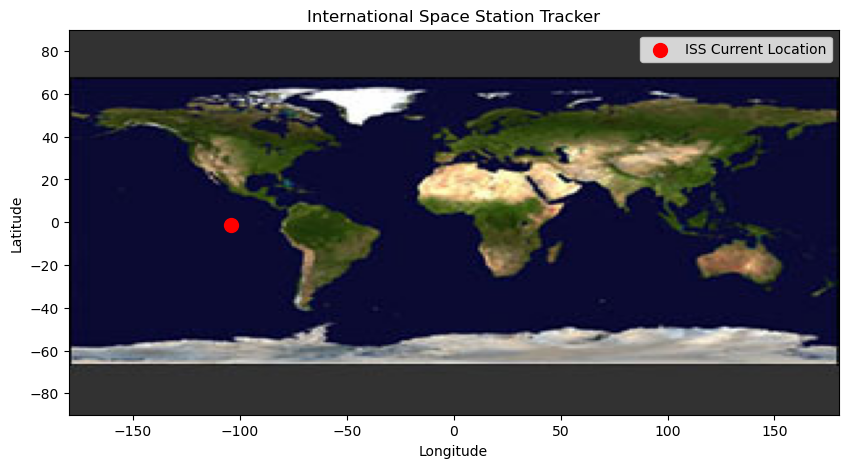

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [17]:
import requests
import matplotlib.pyplot as plt

def track_iss():
    # Retrieve the current location of the ISS
    response = requests.get('http://api.open-notify.org/iss-now.json')
    data = response.json()
    latitude = float(data['iss_position']['latitude'])
    longitude = float(data['iss_position']['longitude'])
    
    # Print the current latitude and longitude
    print(f"Current Latitude: {latitude}, Longitude: {longitude}")
    
    # Plot the current location on a world map
    plt.figure(figsize=(10, 5))
    world_map = plt.imread('world_map.jpg')
    plt.imshow(world_map, extent=[-180, 180, -90, 90])
    plt.scatter(longitude, latitude, color='red', s=100, label='ISS Current Location')
    plt.title('International Space Station Tracker')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.legend()
    plt.show()

def calculate_next_pass(location):
    # Calculate the next pass of the ISS over the specified location
    url = f"http://api.open-notify.org/iss-pass.json?lat={location[0]}&lon={location[1]}"
    response = requests.get(url)
    data = response.json()
    pass_time = data['response'][0]['risetime']
    duration = data['response'][0]['duration']
    
    # Print the next pass time and duration
    print(f"Next Pass Time: {pass_time}, Duration: {duration} seconds")

# Example usage:
track_iss()

# Specify the location coordinates (latitude, longitude)
location = (37.7749, -122.4194)  # San Francisco
calculate_next_pass(location)

Current Latitude: 6.4418, Longitude: -98.6319


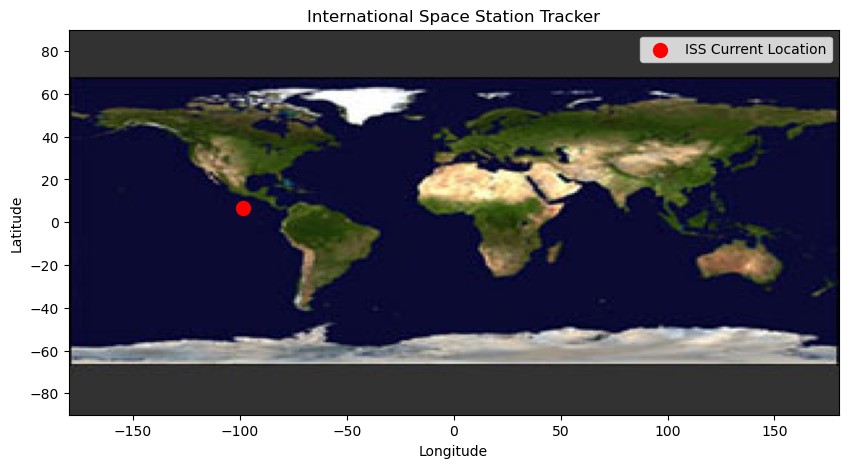

Error occurred while calculating next ISS pass: 404 Client Error: Not Found for url: http://api.open-notify.org/iss-pass.json?lat=37.7749&lon=-122.4194


In [20]:
import requests
import matplotlib.pyplot as plt

def track_iss():
    try:
        # Retrieve the current location of the ISS
        response = requests.get('http://api.open-notify.org/iss-now.json')
        response.raise_for_status()
        data = response.json()
        latitude = float(data['iss_position']['latitude'])
        longitude = float(data['iss_position']['longitude'])
        
        # Print the current latitude and longitude
        print(f"Current Latitude: {latitude}, Longitude: {longitude}")
        
        # Plot the current location on a world map
        plt.figure(figsize=(10, 5))
        world_map = plt.imread('world_map.jpg')
        plt.imshow(world_map, extent=[-180, 180, -90, 90])
        plt.scatter(longitude, latitude, color='red', s=100, label='ISS Current Location')
        plt.title('International Space Station Tracker')
        plt.xlabel('Longitude')
        plt.ylabel('Latitude')
        plt.legend()
        plt.show()
    except (requests.exceptions.RequestException, ValueError, KeyError) as e:
        print("Error occurred while retrieving ISS location:", str(e))

def calculate_next_pass(location):
    try:
        # Calculate the next pass of the ISS over the specified location
        url = f"http://api.open-notify.org/iss-pass.json?lat={location[0]}&lon={location[1]}"
        response = requests.get(url)
        response.raise_for_status()
        data = response.json()
        pass_time = data['response'][0]['risetime']
        duration = data['response'][0]['duration']
        
        # Print the next pass time and duration
        print(f"Next Pass Time: {pass_time}, Duration: {duration} seconds")
    except (requests.exceptions.RequestException, ValueError, KeyError) as e:
        print("Error occurred while calculating next ISS pass:", str(e))

# Example usage:
track_iss()

# Specify the location coordinates (latitude, longitude)
location = (37.7749, -122.4194)  # San Francisco
calculate_next_pass(location)


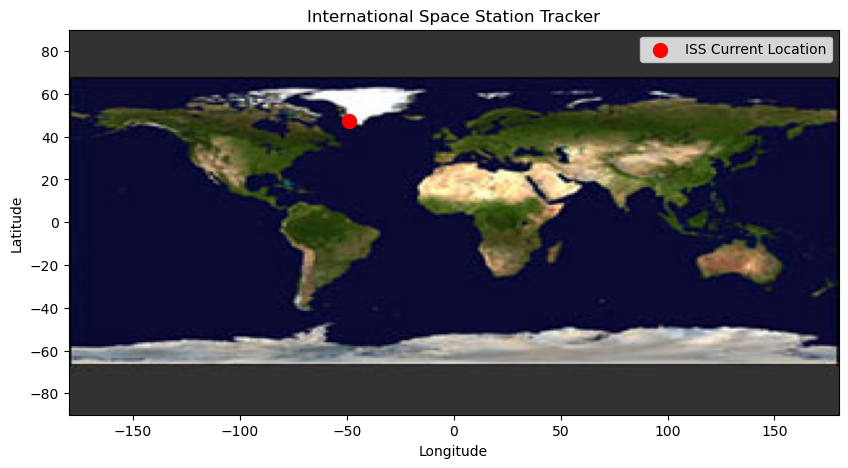

Error retrieving ISS passes: 404 Client Error: Not Found for url: http://api.open-notify.org/iss-pass.json?lat=-49.1425&lon=47.1458


In [23]:
import json
import requests
import matplotlib.pyplot as plt

def get_iss_location():
    try:
        response = requests.get('http://api.open-notify.org/iss-now.json')
        response.raise_for_status()
        data = response.content.decode('utf-8')
        json_data = json.loads(data)
        longitude = float(json_data['iss_position']['longitude'])
        latitude = float(json_data['iss_position']['latitude'])
        return longitude, latitude
    except (requests.exceptions.RequestException, json.JSONDecodeError) as e:
        print('Error retrieving ISS location:', str(e))
        return None

def plot_iss_location(longitude, latitude, map_image):
    plt.figure(figsize=(10, 5))
    world_map = plt.imread(map_image)
    plt.imshow(world_map, extent=[-180, 180, -90, 90])
    plt.scatter(longitude, latitude, color='red', s=100, label='ISS Current Location')
    plt.title('International Space Station Tracker')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.legend()
    plt.show()

def calculate_iss_pass(location):
    try:
        url = f"http://api.open-notify.org/iss-pass.json?lat={location[0]}&lon={location[1]}"
        response = requests.get(url)
        response.raise_for_status()
        data = response.content.decode('utf-8')
        json_data = json.loads(data)
        passes = json_data['response']
        for p in passes:
            pass_time = p['risetime']
            duration = p['duration']
            print(f"ISS will pass over the location at: {pass_time}, Duration: {duration} seconds")
    except (requests.exceptions.RequestException, json.JSONDecodeError) as e:
        print('Error retrieving ISS passes:', str(e))

# Get ISS location
location = get_iss_location()
if location:
    longitude, latitude = location

    # Plot ISS location on map
    map_image = 'world_map.jpg'
    plot_iss_location(longitude, latitude, map_image)

    # Calculate ISS passes for a specific location
    calculate_iss_pass(location)


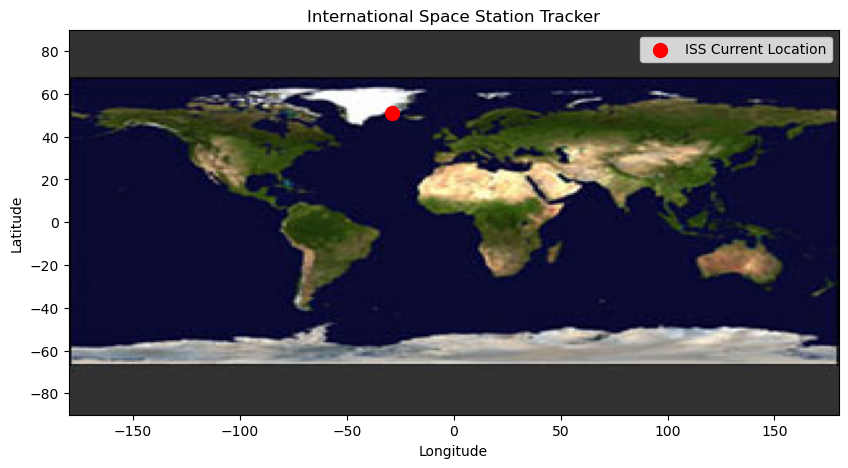

ISS passes not found for the specified location.


In [25]:
import json
import requests
import matplotlib.pyplot as plt

def get_iss_location():
    try:
        response = requests.get('http://api.open-notify.org/iss-now.json')
        response.raise_for_status()
        data = response.json()
        longitude = float(data['iss_position']['longitude'])
        latitude = float(data['iss_position']['latitude'])
        return longitude, latitude
    except (requests.exceptions.RequestException, json.JSONDecodeError) as e:
        print('Error retrieving ISS location:', str(e))
        return None

def plot_iss_location(longitude, latitude, map_image):
    plt.figure(figsize=(10, 5))
    world_map = plt.imread(map_image)
    plt.imshow(world_map, extent=[-180, 180, -90, 90])
    plt.scatter(longitude, latitude, color='red', s=100, label='ISS Current Location')
    plt.title('International Space Station Tracker')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.legend()
    plt.show()

def calculate_iss_pass(location):
    try:
        url = f"http://api.open-notify.org/iss-pass.json?lat={location[0]}&lon={location[1]}"
        response = requests.get(url)
        if response.status_code == 404:
            print('ISS passes not found for the specified location.')
            return
        response.raise_for_status()
        data = response.json()
        passes = data['response']
        for p in passes:
            pass_time = p['risetime']
            duration = p['duration']
            print(f"ISS will pass over the location at: {pass_time}, Duration: {duration} seconds")
    except (requests.exceptions.RequestException, json.JSONDecodeError) as e:
        print('Error retrieving ISS passes:', str(e))

# Get ISS location
location = get_iss_location()
if location:
    longitude, latitude = location

    # Plot ISS location on map
    map_image = 'world_map.jpg'
    plot_iss_location(longitude, latitude, map_image)

    # Calculate ISS passes for a specific location
    calculate_iss_pass(location)
